In [28]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
file_list = os.listdir("/work/data/Raw Data Files")
file_list

['data.yaml',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2018_19_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Crosswalks.zip',
 'MERGED2015_16_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv']

In [30]:
dir = os.listdir('/work/data/Raw Data Files')

csv_files =[]

for file in dir:
    if ".csv" and "MERGED" in file:
        csv_files.append(file)

    else:
        csv_files

csv_files

['MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv']

In [37]:
# randomly selecting one file
random_file = random.choice(csv_files)
print ("Selected file:" , random_file)

Selected file: MERGED2007_08_PP.csv


In [38]:
my_df = pd.read_csv("/work/data/Raw Data Files/MERGED2007_08_PP.csv", usecols= ['INSTNM','TUITIONFEE_IN'])
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971 entries, 0 to 6970
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6971 non-null   object 
 1   TUITIONFEE_IN  4183 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.0+ KB


In [39]:
# Find out how many observations have missing value.

print(" \nCount total NaN at each column in a DataFrame : \n\n" , my_df.isnull().sum())


 
Count total NaN at each column in a DataFrame : 

 INSTNM              0
TUITIONFEE_IN    2788
dtype: int64


In [40]:
# Drop those observations with missing value
# Disaply the number of observations afterward

NaN_file = my_df.dropna().reset_index(drop = True)
NaN_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4183 non-null   object 
 1   TUITIONFEE_IN  4183 non-null   float64
dtypes: float64(1), object(1)
memory usage: 65.5+ KB


In [41]:
NaN_file.shape

(4183, 2)

In [42]:
# Find out how many observations have 0 tution.

NaN_file[NaN_file["TUITIONFEE_IN"] == 0]


,INSTNM,TUITIONFEE_IN
424,United States Air Force Academy,0.0
1231,United States Naval Academy,0.0
2046,United States Merchant Marine Academy,0.0
2047,United States Military Academy,0.0
2054,Webb Institute,0.0


In [43]:
new_file = NaN_file[NaN_file["TUITIONFEE_IN"] !=0]
new_file.shape

(4178, 2)

In [44]:
# Calculate and display the mean (average) of the tuitions of all the remaining observations

avg_tuition = new_file["TUITIONFEE_IN"].mean()
avg_tuition

10732.077549066538

In [45]:
# Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.

random1 = new_file.sample()
random1

,INSTNM,TUITIONFEE_IN
387,Colorado College,33972.0


In [47]:
# Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

random1_diff = avg_tuition - float(random1['TUITIONFEE_IN'])
abs(round(random1_diff,2))

23239.92

In [48]:
# Repeat 10 to 11 several times get the feel of the size of the difference in means

random2 = new_file.sample()
print(random2)
random2_diff = abs(avg_tuition - float(random2['TUITIONFEE_IN']))
print("Difference from the average tuition:" , round(random2_diff,2))

                              INSTNM  TUITIONFEE_IN
2613  Reading Area Community College         3024.0
Difference from the average tuition: 7708.08


In [49]:
random3 = new_file.sample()
print(random3)
random3_diff = abs(avg_tuition - float(random3['TUITIONFEE_IN']))
print("Difference from the average tuition:" , round(random3_diff,2))

                    INSTNM  TUITIONFEE_IN
429  Bais Binyomin Academy         5100.0
Difference from the average tuition: 5632.08


In [50]:
# Randomly select 20 observations, display the tuition of these observation.

schools_20 = new_file.sample(20)
print(schools_20)

# Calculate and display the mean tuition of these 20 observations
sample_avg = schools_20['TUITIONFEE_IN'].mean()
print("Average of these 20 random schools" , sample_avg)

# Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
schools_20_diff = abs(avg_tuition-sample_avg)
print("Difference between average overall tuitions and sample", round(schools_20_diff,2))

                                              INSTNM  TUITIONFEE_IN
2323               Ohio State University-Main Campus         8676.0
2392                            Murray State College         2566.0
74                          DeVry University-Arizona        13220.0
267              Los Angeles Trade Technical College          590.0
808                                Principia College        22080.0
3618              Oconee Fall Line Technical College         1539.0
359       Vanguard University of Southern California        22986.0
3449                        Valley College-Princeton         7750.0
174           California State University-Northridge         3350.0
2155                  Queens University of Charlotte        20720.0
2291                               Malone University        18870.0
2147         University of North Carolina Wilmington         4399.0
955                         Iowa Wesleyan University        18870.0
1549                     Conception Seminary Col

In [51]:
# Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation

schools_20_2 = new_file.sample(20)
print(schools_20_2)

# Calculate and display the mean tuition of these 20 observations
sample_avg2 = schools_20_2['TUITIONFEE_IN'].mean()
print("Average of these 20 random schools" , sample_avg2)

# Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
schools_20_2_diff = abs(avg_tuition-sample_avg2)
print("Difference between average overall tuitions and sample", round(schools_20_2_diff,2))

                                                 INSTNM  TUITIONFEE_IN
2599  Jefferson (Philadelphia University + Thomas Je...        25556.0
658                     Chattahoochee Technical College         1560.0
2469                      The Art Institutes of York-PA        16682.0
2494                       Dean Institute of Technology         9950.0
3670       University of Phoenix-Central Florida Campus        11288.0
20                        Herzing University-Birmingham         9240.0
501                          Johnson University Florida         9550.0
1559                               Fontbonne University        18320.0
2099                           East Carolina University         4368.0
3820           ITT Technical Institute-Plymouth Meeting        15600.0
3086                      Central Washington University         5493.0
2531                                   Keystone College        18340.0
212                                     Cypress College          600.0
1056  

In [52]:
# Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation

schools_20_3 = new_file.sample(20)
print(schools_20_3)

# Calculate and display the mean tuition of these 20 observations
sample_avg3 = schools_20_3['TUITIONFEE_IN'].mean()
print("Average of these 20 random schools" , sample_avg3)

# Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
schools_20_3_diff = abs(avg_tuition-sample_avg3)
print("Difference between average overall tuitions and sample", round(schools_20_3_diff,2))

                                                 INSTNM  TUITIONFEE_IN
2582  Pennsylvania State University-Penn State Brand...        11006.0
2284                                  Lake Erie College        23886.0
4179                Southeastern College-St. Petersburg        13256.0
1734                               Essex County College         2832.0
3143                                    Bethany College        18203.0
2245                         Cleveland State University         7945.0
1078                    Brown Mackie College-Louisville         7836.0
3191                                  Marian University        18650.0
3212                  Chippewa Valley Technical College         4244.0
1666                       Nebraska Wesleyan University        20252.0
2110               Guilford Technical Community College         1481.0
1099                   Bossier Parish Community College         1760.0
4095                     Strayer University-Cobb Campus        11712.0
4073  

**Based on my observation, there is a wider gap between the sample of one institution and the sample mean than the population mean and the average sample. **

Write a function that take two input parameters:

x (number of observations)
y (the name of the dataframe).
The function will perform the following:

Randomly select x observations from y
Calculate the mean of these x observations
Calculate the mean of all observations
Calculate the difference between the two means
Return the difference

In [53]:
def Avg_Diff(sample,data):
    all_avg = data.mean()
    schools = data.sample(sample)
    sample_avg = schools.mean()
    diff = (all_avg - sample_avg)
    print('Schools:' , data , 'Sample schools:', schools, 'Average Diff:', round(diff,2), sep= '\n')

In [54]:
# test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function

Avg_Diff(10,new_file)

Schools:
                                      INSTNM  TUITIONFEE_IN
0                   Alabama A & M University         4072.0
1        University of Alabama at Birmingham         4208.0
2                         Amridge University         6240.0
3        University of Alabama in Huntsville         5216.0
4                   Alabama State University         4508.0
...                                      ...            ...
4178        Southeastern College-Miami Lakes        13256.0
4179     Southeastern College-St. Petersburg        13256.0
4180  McCann School of Business & Technology        10896.0
4181  McCann School of Business & Technology        10896.0
4182  McCann School of Business & Technology        10896.0

[4178 rows x 2 columns]
Sample schools:
                                             INSTNM  TUITIONFEE_IN
1687              Truckee Meadows Community College         1763.0
2895                          Mountain View College         1170.0
1638               Montana Te

In [55]:
# Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

sample_sizes = list(range(1,51))
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [56]:
# Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

def avg_calc(input_value):
    avg = sum(input_value)/len(input_value)
    return avg
    

In [57]:
means_diff = []

for element in sample_sizes:
    sample = random.sample(sample_sizes, element)
    sample_avg = avg_calc(sample)
    avg_diff = abs(avg_calc(sample_sizes) - sample_avg)
    means_diff.append(round(avg_diff,2))

print(means_diff)

[24.5, 8.0, 11.5, 9.0, 1.7, 3.83, 5.36, 0.25, 0.06, 4.9, 0.95, 0.92, 1.12, 3.57, 3.43, 1.5, 3.5, 5.11, 0.34, 1.55, 2.02, 0.32, 3.02, 0.79, 0.74, 0.92, 3.02, 1.21, 1.29, 2.6, 0.02, 0.84, 0.59, 1.47, 0.19, 0.5, 1.18, 0.92, 0.47, 0.05, 0.09, 0.02, 0.62, 0.16, 0.5, 1.04, 0.59, 0.19, 0.4, 0.0]


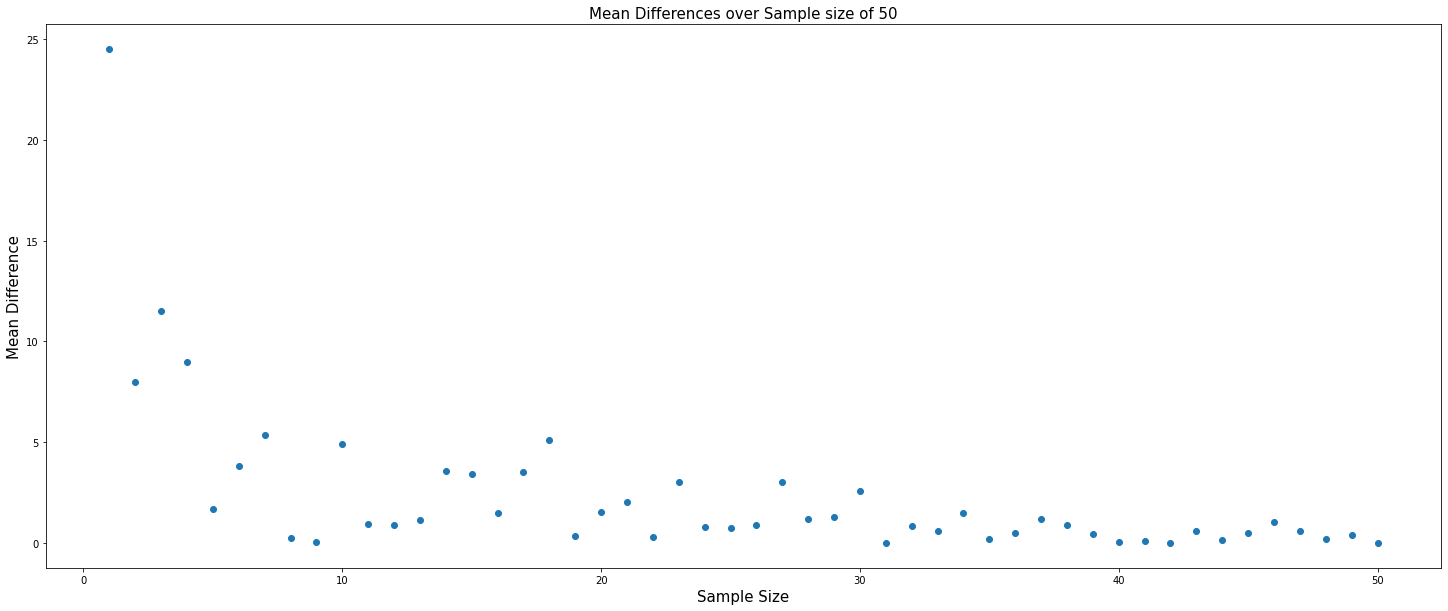

In [58]:
# Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough

x= sample_sizes
y= means_diff

plt.rcParams["figure.figsize"] = (25,10)

plt.scatter(x,y)
plt.xlabel("Sample Size",fontsize=15)
plt.ylabel("Mean Difference", fontsize=15)
plt.title("Mean Differences over Sample size of 50", fontsize=15)

plt.show()


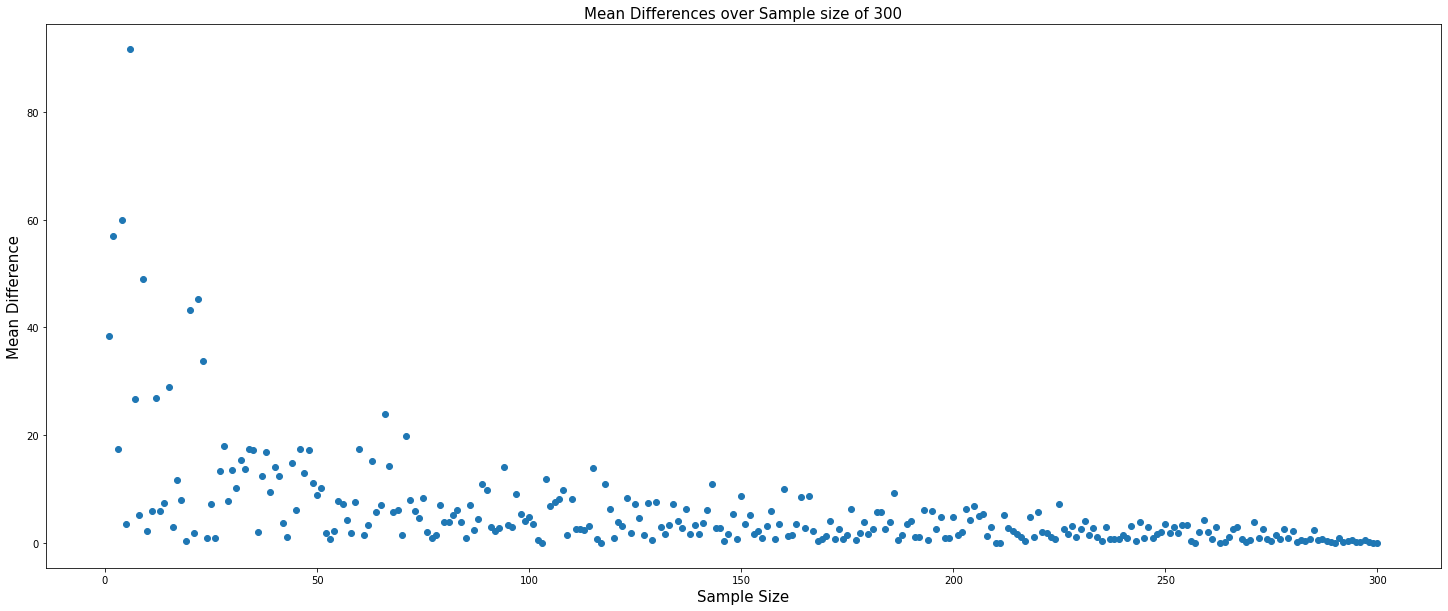

In [59]:
# repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.

# testing 300 sample size

sample_sizes_300 = list(range(1,301))

means_diff_300 = []
for element_300 in sample_sizes_300:
    sample_300 = random.sample(sample_sizes_300, element_300)
    sample_avg_300 = avg_calc(sample_300)
    avg_diff_300 = abs(avg_calc(sample_sizes_300) - sample_avg_300)
    means_diff_300.append(round(avg_diff_300,2))


x= sample_sizes_300
y= means_diff_300


plt.scatter(x,y)
plt.xlabel("Sample Size",fontsize=15)
plt.ylabel("Mean Difference", fontsize=15)
plt.title("Mean Differences over Sample size of 300", fontsize=15)

plt.show()


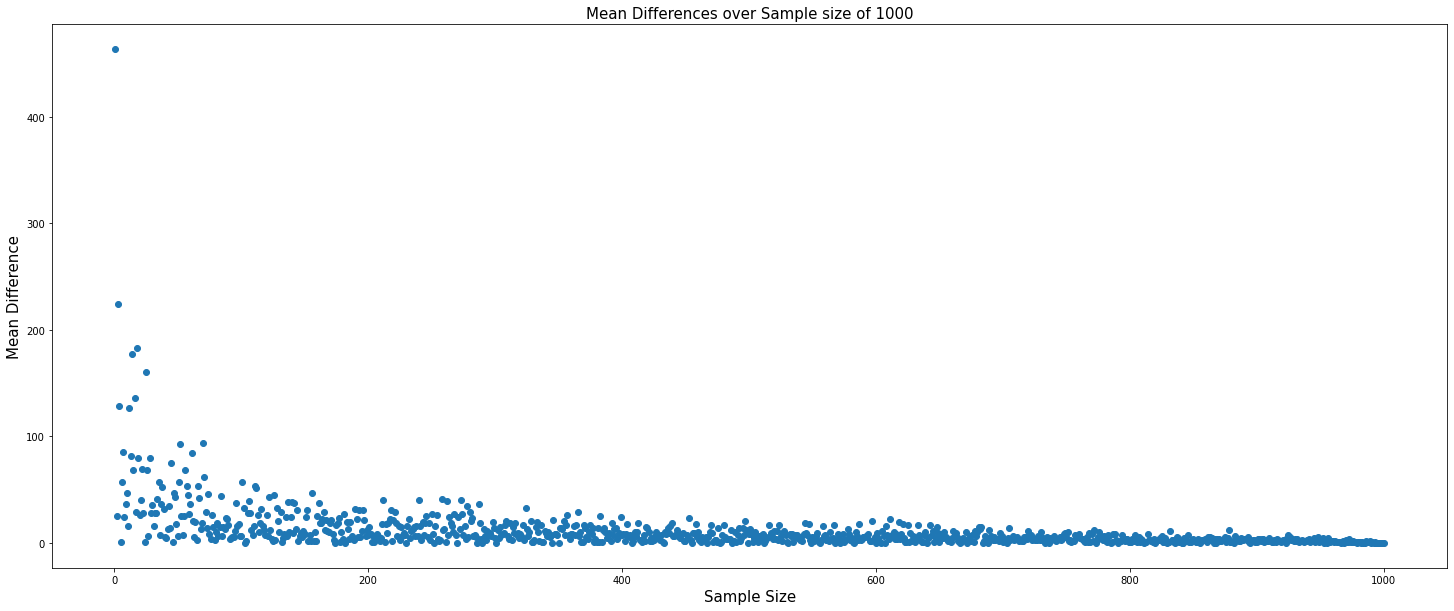

In [60]:
# testing with sample size of 1000

sample_sizes_1000 = list(range(1,1001))

means_diff_1000 = []
for element_1000 in sample_sizes_1000:
    sample_1000 = random.sample(sample_sizes_1000, element_1000)
    sample_avg_1000 = avg_calc(sample_1000)
    avg_diff_1000 = abs(avg_calc(sample_sizes_1000) - sample_avg_1000)
    means_diff_1000.append(round(avg_diff_1000,2))


x= sample_sizes_1000
y= means_diff_1000


plt.scatter(x,y)
plt.xlabel("Sample Size",fontsize=15)
plt.ylabel("Mean Difference", fontsize=15)
plt.title("Mean Differences over Sample size of 1000", fontsize=15)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51271e1d-0fdf-4e0c-bc59-1208f6bbdfcd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>